<a href="https://colab.research.google.com/github/mahadhyut09/recogdigits/blob/main/digitsrecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [ ]:
dig=load_digits()

In [ ]:
dir(dig)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
dig.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

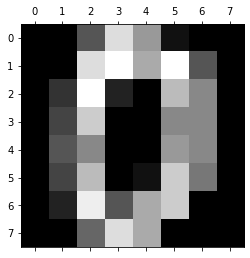

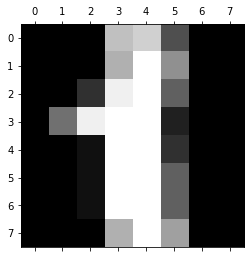

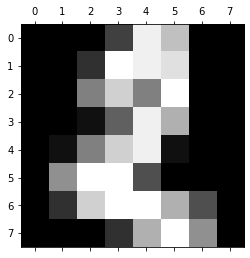

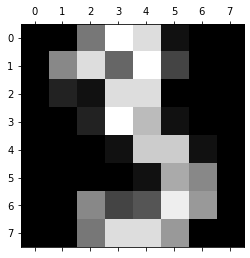

In [ ]:
plt.gray()
for i in range(4):
  plt.matshow(dig.images[i])

In [ ]:
dig.target[0:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(dig.data,dig.target,test_size=0.22,random_state=50)

In [ ]:
x_train

array([[ 0.,  0.,  8., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  7., ...,  3.,  0.,  0.],
       ...,
       [ 0.,  0., 15., ...,  3.,  0.,  0.],
       [ 0.,  0., 13., ..., 10.,  0.,  0.],
       [ 0.,  0.,  8., ...,  0.,  0.,  0.]])

In [ ]:
len(x_train)

1401

In [ ]:
x_test

array([[ 0.,  1., 10., ...,  9.,  0.,  0.],
       [ 0.,  0.,  6., ...,  4.,  0.,  0.],
       [ 0.,  0.,  9., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  1.,  9., ..., 14.,  5.,  0.],
       [ 0.,  0., 11., ...,  3.,  0.,  0.],
       [ 0.,  0.,  4., ...,  8.,  0.,  0.]])

In [ ]:
len(x_test)

396

In [ ]:
from sklearn.linear_model import LogisticRegression
fst = LogisticRegression(max_iter=10000)

In [ ]:
fst.fit(x_train,y_train)


LogisticRegression(max_iter=10000)

In [ ]:
import pickle 
pickle_out = open("model.pkl","wb")
pickle.dump(fst, pickle_out)
pickle_out.close()



In [ ]:
fst.score(x_test,y_test)

0.9696969696969697

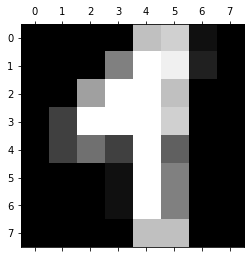

In [ ]:
plt.matshow(dig.images[56])

In [ ]:
dig.target[56]

1

In [ ]:
fst.predict([dig.data[56]])

array([1])

In [ ]:
fst.predict(dig.data[0:9])

array([0, 1, 2, 3, 4, 9, 6, 7, 8])

In [ ]:
y_pred=fst.predict(x_test)
from sklearn.metrics import confusion_matrix

confm= confusion_matrix(y_test, y_pred)
confm

array([[47,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  0, 46,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 31,  0,  1,  0,  0,  0,  1],
       [ 0,  1,  0,  0, 32,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 34,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  1],
       [ 0,  1,  1,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 43]])

Text(60.0, 0.5, 'prediction data')

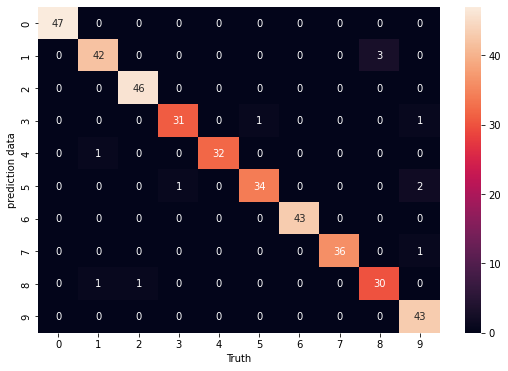

In [ ]:
import seaborn as sb
plt.figure(figsize=(9,6))
sb.heatmap(confm,annot=True)
plt.xlabel('Truth')
plt.ylabel('prediction data')

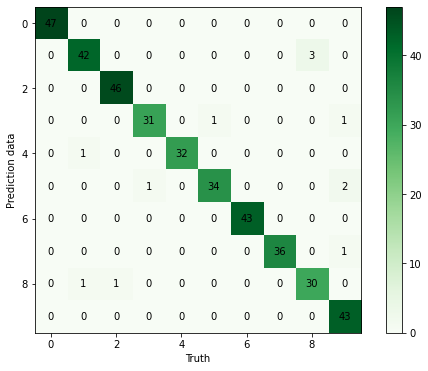

In [ ]:
fig, ax = plt.subplots(figsize=(9,6))
im = ax.imshow(confm, cmap='Greens')

# add labels to the plot
ax.set_xlabel('Truth')
ax.set_ylabel('Prediction data')

# create a colorbar
cbar = ax.figure.colorbar(im)

# add data values to the plot
for i in range(len(confm)):
    for j in range(len(confm[i])):
        ax.text(j, i, confm[i][j], ha="center", va="center", color="black")

plt.show()